# Homework 9 Backpropagation and Introduction to Pytorch 

**Due date**: December 5th, Monday by 11:59pm

**Note:** For this homework, you **do not** need any operators other than standard matrix multiplication and addition.

*   **If you are going to use operators like $⊙$, explain the meaning of it and give examples which expands the operation down to element level.** But if you strictly follow the question, you really do not need it.
*   **Distinguish your matrices, vectors and scalars**. One suggestion is use capital letter to denote a matrix A, use bold font with lower case $\mathbf{a}$ or $\vec{a}$ to denote a vector, and use lower case letter $a$ to denote a scalar. **If alternative notation are used, you need to define it before you answer any questions.**
*   Show intermediate steps for derivation questions, and run your code before submission.





## Problem 1: Backpropagation in a simple MLP (48 points)

In general, deep learning models are trained iteratively. For the simplest type of model at each iteration:

1.   There is a `forward_pass()` which computes the loss function value $L(y, \hat{y})$ between training target $y$ and prediction for training example $\hat{y}$. The loss function $L(y, \hat{y})$ is interpreted as **error** between $y$ and $\hat{y}$ computed with model parameter $\boldsymbol{\Theta}$.
2.   The model parameter $\boldsymbol{\Theta}$ is not yet perfect, we need to adjust the value of $\boldsymbol{\Theta}$ through gradient-based optimization methods, such as (stochastic) gradient descent. This step, we propagate **error** $L(y, \hat{y})$ from the prediction end to the input of the neural network, such step is so called `backward_pass()`. 

Considering a simple Multi-Layer Perceptron (MLP) model illustrated below. It is a 2 layer perceptron model (excluding output layer). In general, the first layer is the **Input layer** where the data is passed through. The layer before the node computing the loss is the **Output layer**, where you read out your prediction $\hat{y}$ for a given data. 

In general, we can have each layer in any dimension for different purposes. For simplicity, we consider the MLP in the following dimension. (The graph is indeed equivlent as what you have seen in class, but we use two node to represnet each layer since this format is easier for the purpose of this question).


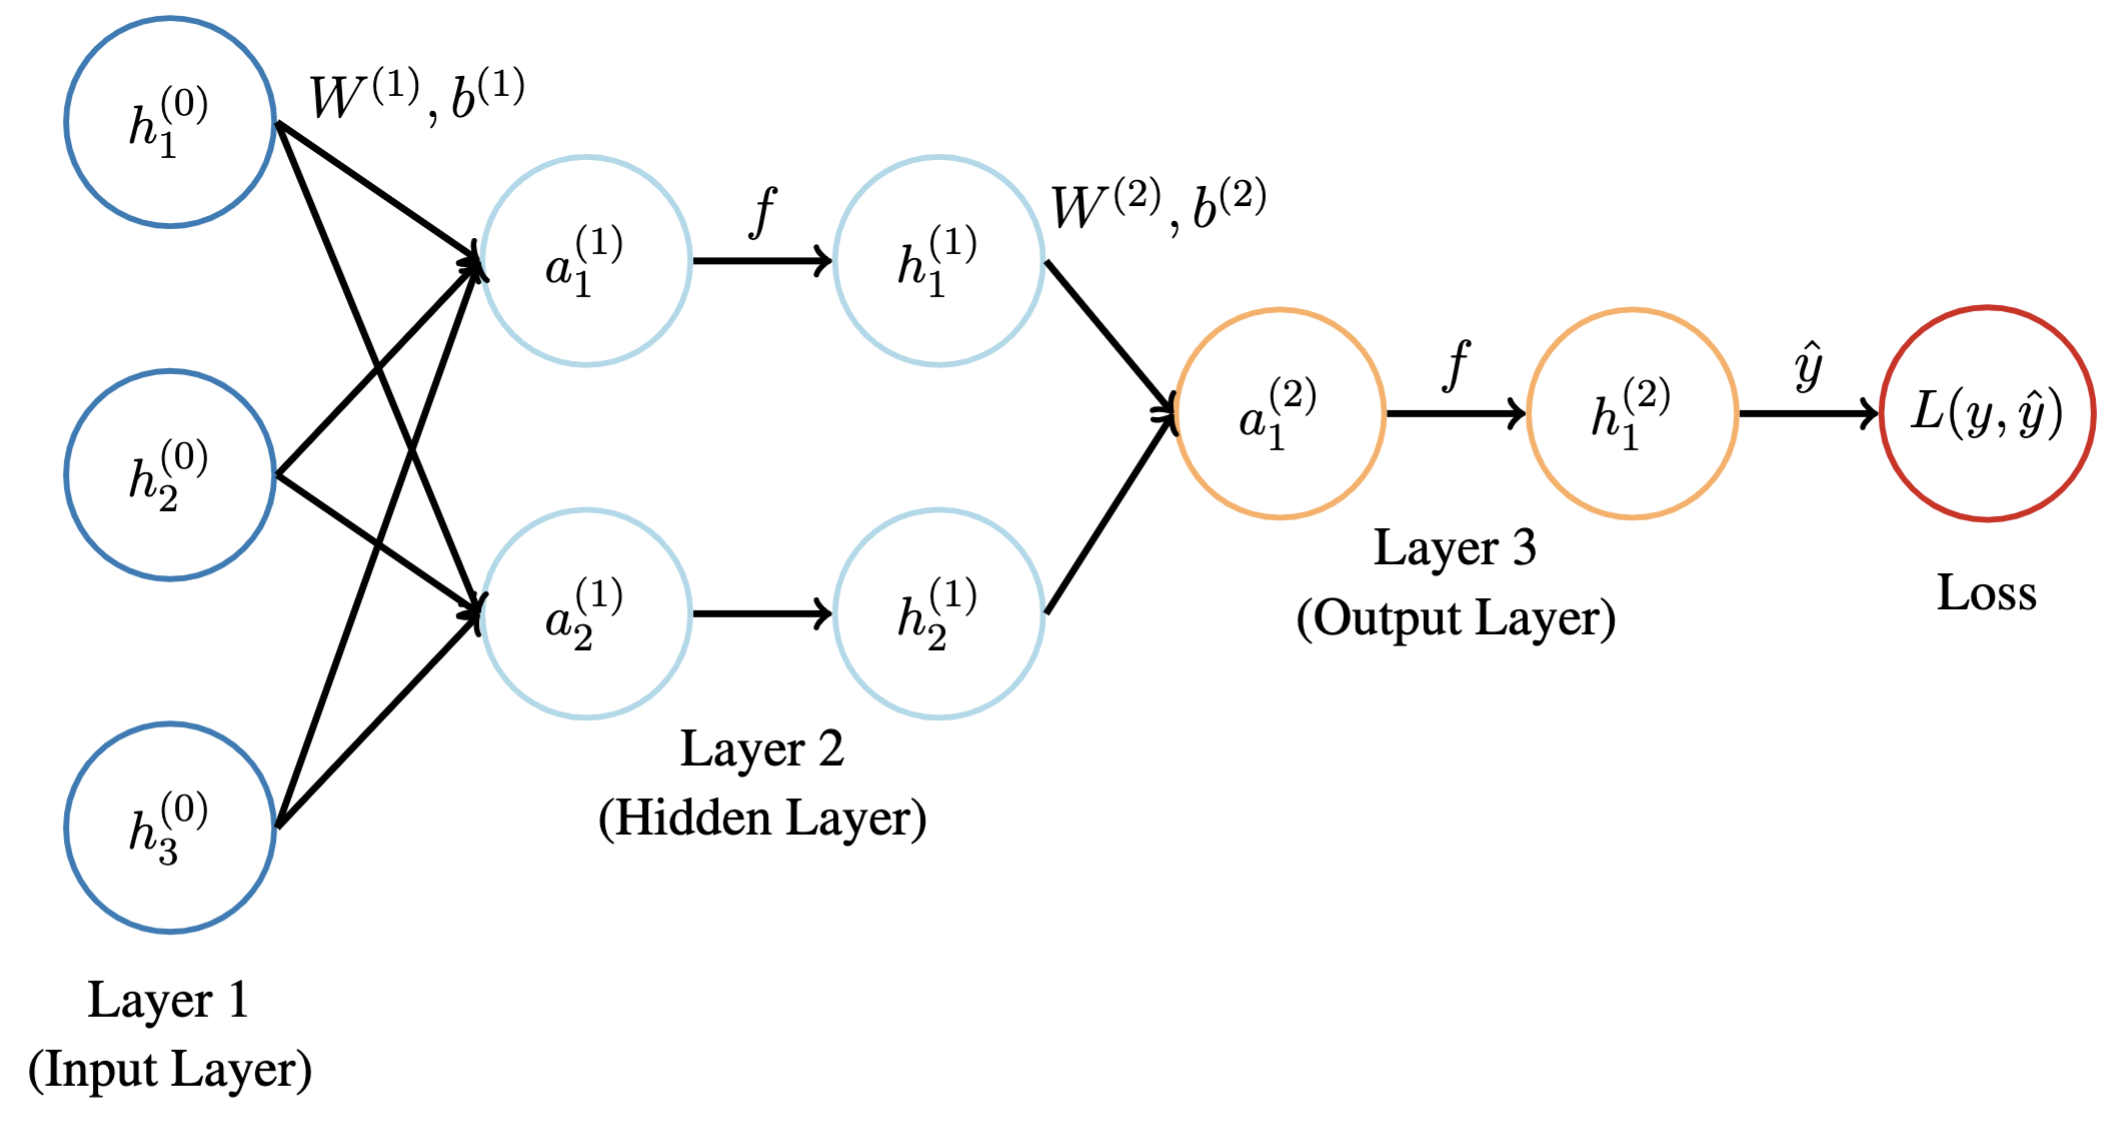

*   We use $a_i^{(j-1)}$ to denote the $i^{th}$ value to be <u> activated</u> in the $j^{th}$ layer. 

*   We use $h_i^{(j-1)}$ to denote the output of the $i^{th}$ node (neuron) in the $j^{th}$ layer. (We use letter $h$ for abbreviating '<u>hidden</u> layer', since when the model is deep, i.e. you have many layers, most of the layers are hidden layers).

* Both $a_i^{(j)}, h_i^{(j)}$ are real numbers. 

* In this model, we have model parameters $\boldsymbol{\Theta} = \{W^{(1)} , \mathbf{b}^{(1)}, W^{(2)}, \mathbf{b}^{(2)} \}$. 

* We use $f$ to denote the activation function at each layer, that $f\left(a_i^{(j)}\right) = h_i^{(j)}$. 


In this question, we are going to deriving both `forward_pass()` and `backward_pass()` for the MLP displayed above. We consider sigmoid function as the activation function, that is:
\begin{align*}
f(z) = \frac{1}{1+e^{-z}}
\end{align*}
We also overload $f(⋅)$ does elementwise operation, that is given $\mathbf{x} \in \mathbb{R}^d$, $\mathbf{x} = (x_1, x_2 ,\cdots, x_d)^T$:
\begin{align*}
f(\mathbf{x}) = \begin{bmatrix}
\frac{1}{1+e^{-x_1}} \\
\frac{1}{1+e^{-x_2}} \\
\vdots \\
\frac{1}{1+e^{-x_d}} \\
\end{bmatrix}
\end{align*}
we consider binary cross entropy loss:
\begin{align*}
L(y, \hat{y}) = -y \ln \hat{y} - (1-y) \ln \left( 1-\hat{y} \right) 
\end{align*}
where $y$ is the target and $\hat{y}$ is the prediction from the model.

**Note:** This question has many parts, **do not be intimidated** by it as they are not difficult. The design of the question intended to guide you through a relatively clean way to make realisation of backpropagation. But you do need to make sure you are actively learning from each questions as each questions (almost) build on top of the previous, and we are using the same trick over and over again. Also, you may find material from discussion 3,9 are helpful for vector/matrix derivatives.


#### 1.a. Neural Network Primer: Get to know the model parameters $\boldsymbol{\Theta}$. (4pts)

Based on the above computation graph, the operation between different layers are **matrix multiplications** with $W$ and **elementwise addition** with $\mathbf{b}$. 

1.   Let $\mathbf{h}^{(0)} = ( h_1^{(0)}, h_2^{(0)}, h_3^{(0)} )^T$, that is $\mathbf{h}^{(0)} \in \mathbb{R}^3$. Let $\mathbf{a}^{(1)} = (a_1^{(1)}, a_2^{(1)})^T$. Write down the relationship among $\mathbf{h}^{(0)}, \mathbf{a}^{(1)},W^{(1)}, \mathbf{b}^{(1)}$ with a single equation. Write down the dimension for $W^{(1)} , \mathbf{b}^{(1)}$.

2.   Write down the dimension for the rest of model parameters, that is  $ W^{(2)}, \mathbf{b}^{(2)}$. 

**__solution__:**
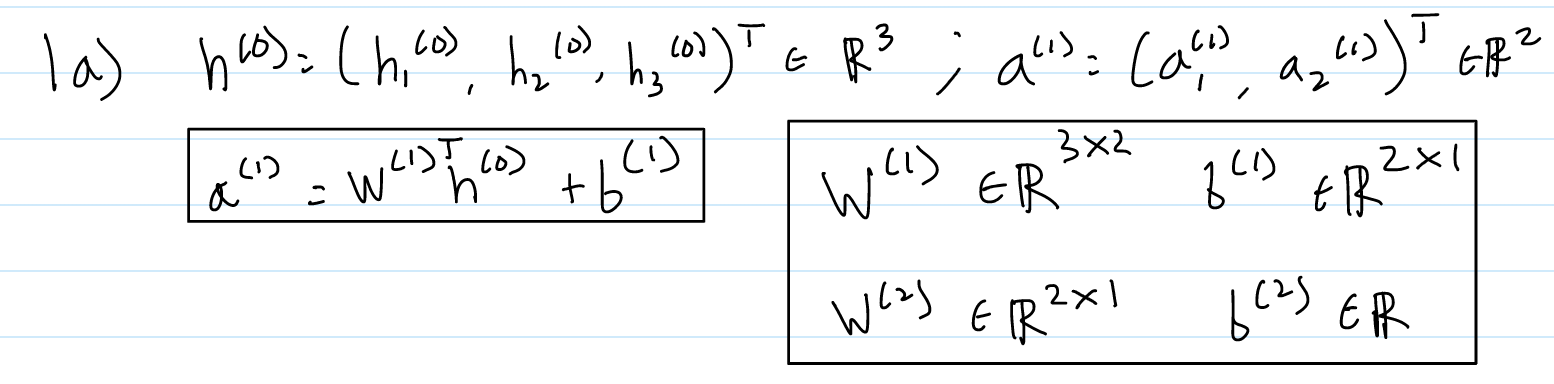

#### 1.b. Neural Network Primer: Realize the equivalence. (4pts)

Observe the MLP model given above, if we are given a single data $\mathbf{x} \in \mathbb{R}^3$ and its prediction from the model is $\hat{y}$. Express elements in $\mathbf{x}$ and $\hat{y}$ in terms of variables defined in the graph.

**__solution__:**

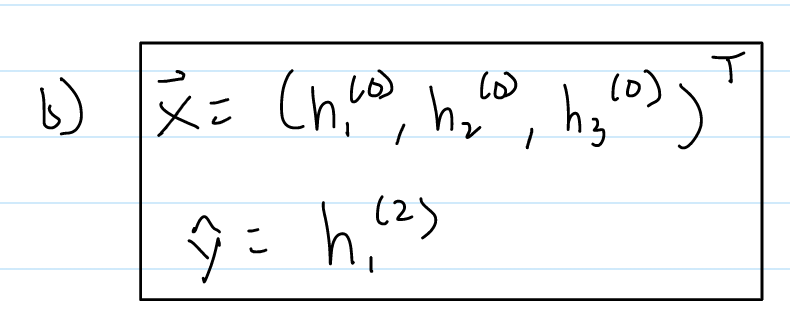

#### 1.c. Backpropagation Prep: A convenience form for activation function. (4pts)

Given $z \in \mathbb{R}$. Compute $ \frac{\partial f(z) }{\partial z} $, and rearrange your derivative in terms of $f(z)$ only. Similarly, Given $\mathbf{x} \in \mathbb{R}^d$, compute $ \frac{\partial f(\mathbf{x}) }{\partial \mathbf{x}} $ and rearrange your solution in terms of $f(\mathbf{x})$.

**__solution__:**

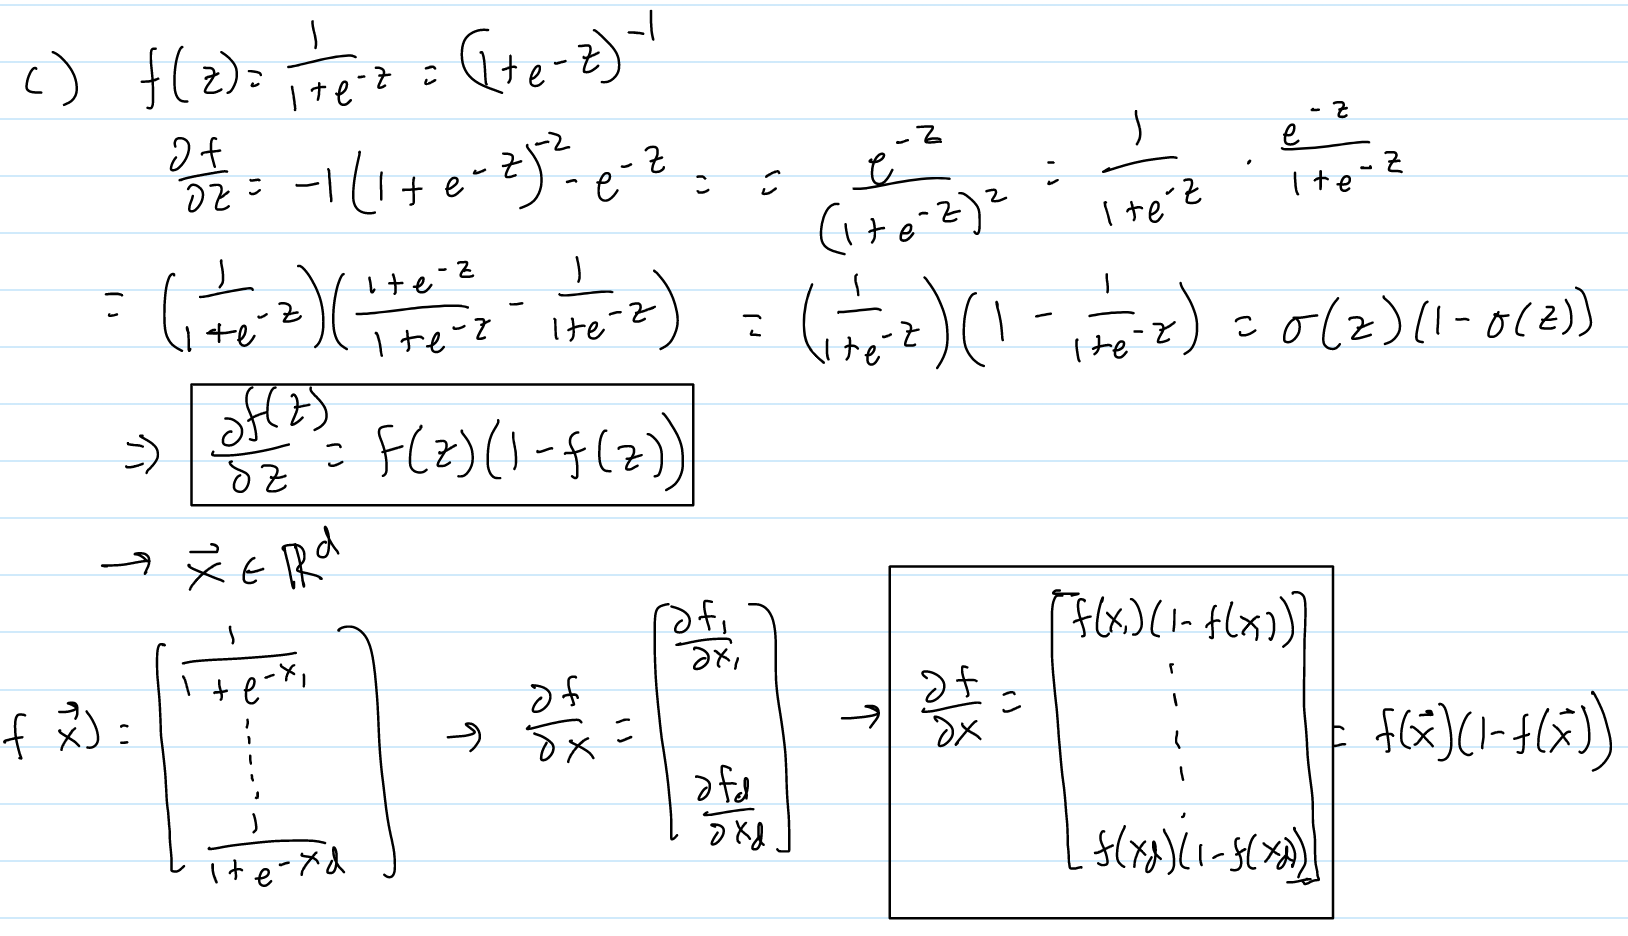

#### 1.d. Backpropagation Prep: Simple derivative (4pts)

Compute $ \frac{\partial L(y, \hat{y}) }{\partial \hat{y}} $ and $ \frac{\partial h_1^{(2)} }{\partial a_1^{(2)}}$, respectively. For both of your final result, express derivatives in terms of $h_1^{(2)}$. You might find question 1.b.-1.c., and the bullet point for explaining activation function $f$ under the graph are helpful.

**__solution__:**

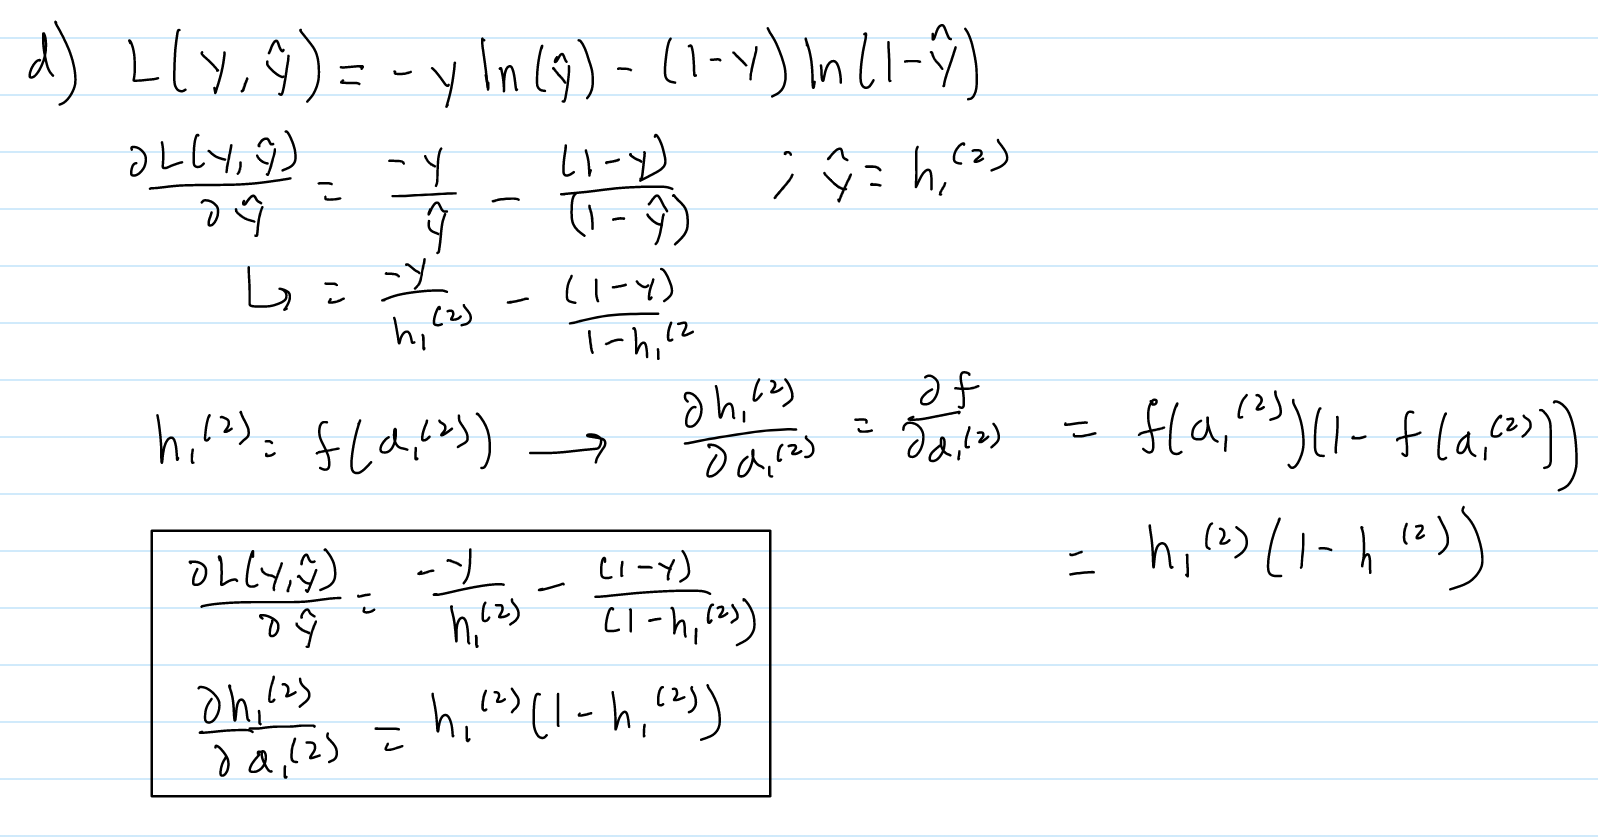

#### 1.e. Backpropagation Backbone: Chain rule (2pts)

Compute $ \frac{\partial L(y, \hat{y}) }{\partial a_1^{(2)}}$ using question 1.d. Alternatively, you could directly compute $  \frac{\partial L(y, \hat{y}) }{\partial a_1^{(2)}} $ and write down the relationship between $  \frac{\partial L(y, \hat{y}) }{\partial a_1^{(2)}}$ and the two derivatives from question 1.d. **But the first approach is way easier!**

(Currently, we are still in 1d, so there is no dimension matching issue.)

**__solution__:**

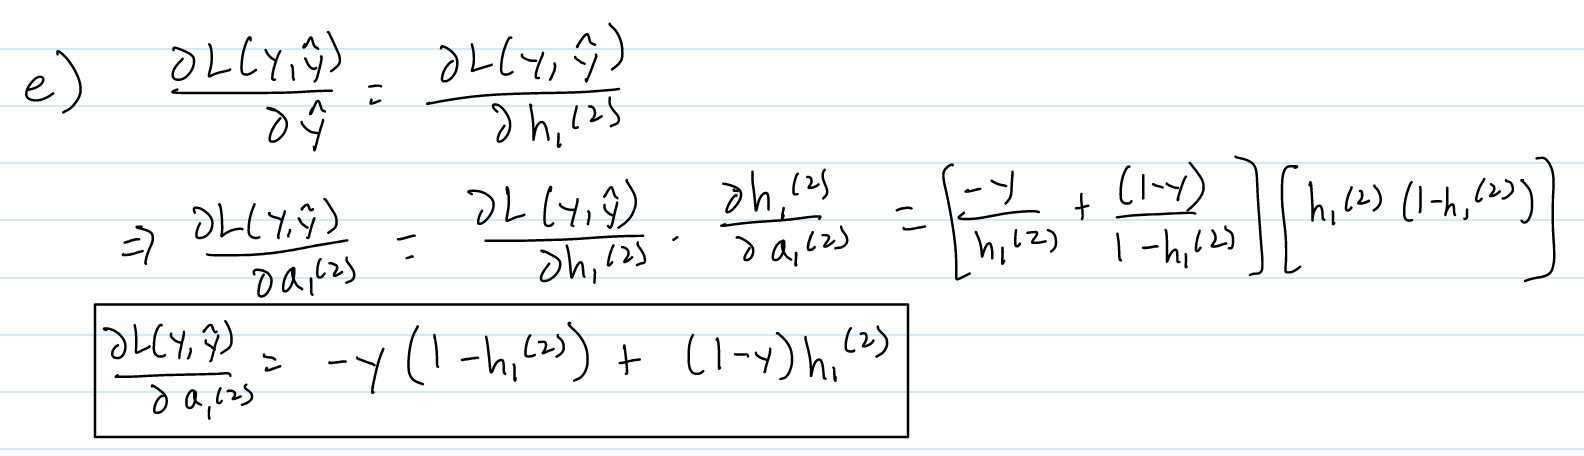

#### 1.f. Backpropagation Consolidation: Chain rule again (4pts)

Compute $\frac{\partial a_1^{(2)}}{\partial \mathbf{b}^{(2)} }$ then use question 1.e. to compute  $ \frac{\partial L(y, \hat{y}) }{\partial \mathbf{b}^{(2)}} $. (This question follows the same recipe as 1.e. and you might want to remind yourself the dimension for each variables from 1.a.)

**__solution__:**
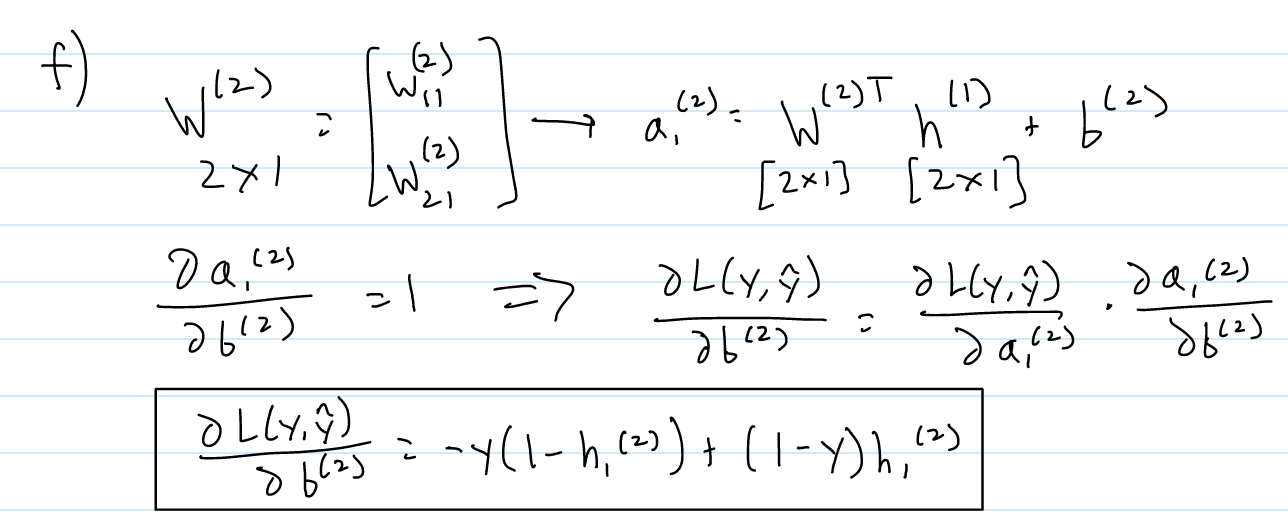

#### 1.g. Backpropagation Intermediate: Chain rule on vectors (4pts)

Compute $ \frac{\partial a_1^{(2)}}{\partial \mathbf{w}^{(2)} }$, then use question 1.e. to compute $\frac{\partial L(y, \hat{y})}{\partial \mathbf{w}^{(2)} }$. (Check against question 1.a., we are taking derivatives on vectors/matrices so we do need to take care of dimension.) 


**__solution__:**
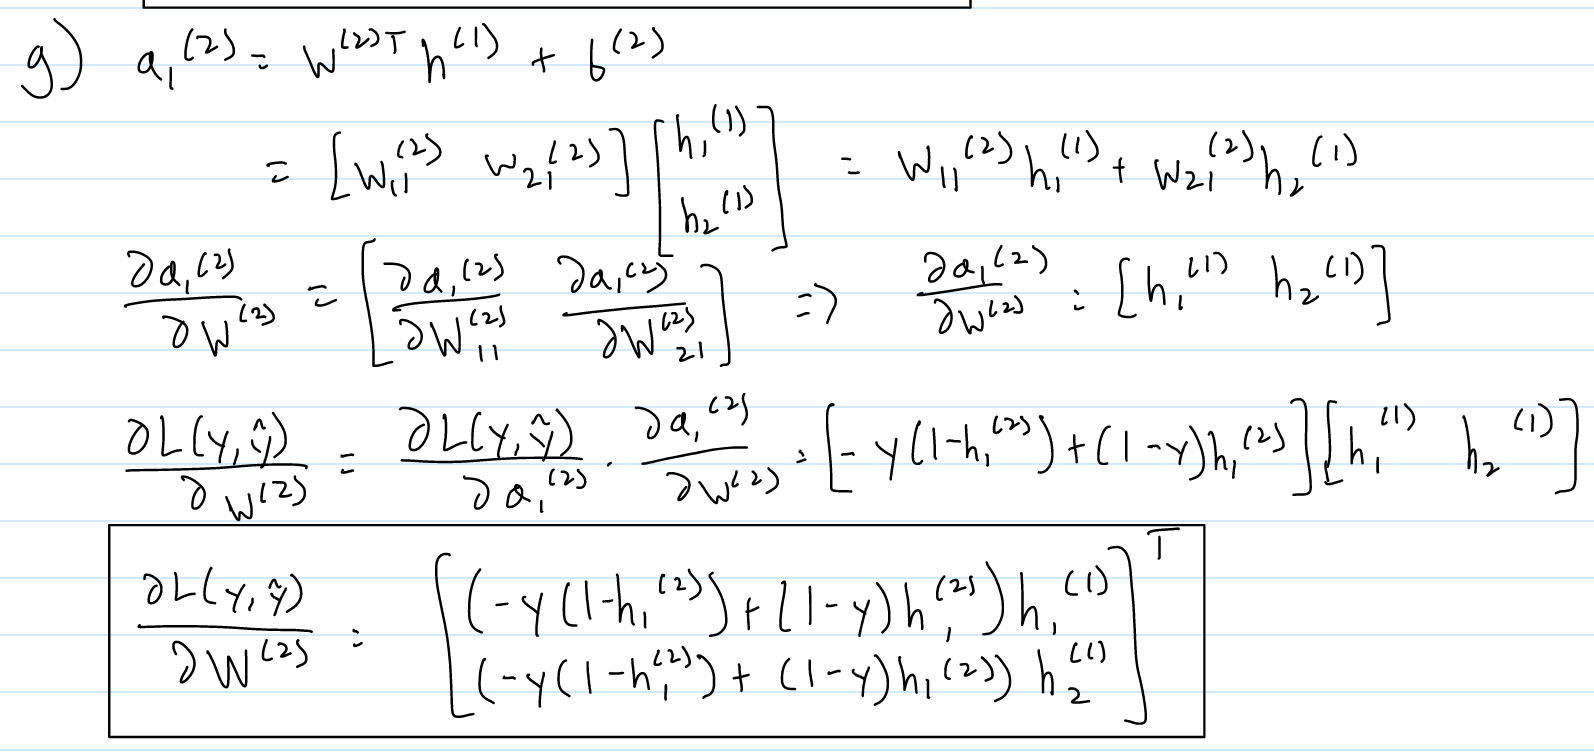

#### 1.h. Backpropagation Advanced: Longer chain rule on vectors (4pts)

Using our previous notation $\mathbf{h}^{(1)} = (h_1^{(1)}, h_2^{(1)})^{T}$. Compute $ \frac{\partial a_1^{(2)}}{\partial \mathbf{h}^{(1)} }$, then $ \frac{\partial L(y, \hat{y})}{\partial \mathbf{h}^{(1)} }$. **The dimension is really important from now on**.



**__solution__:**
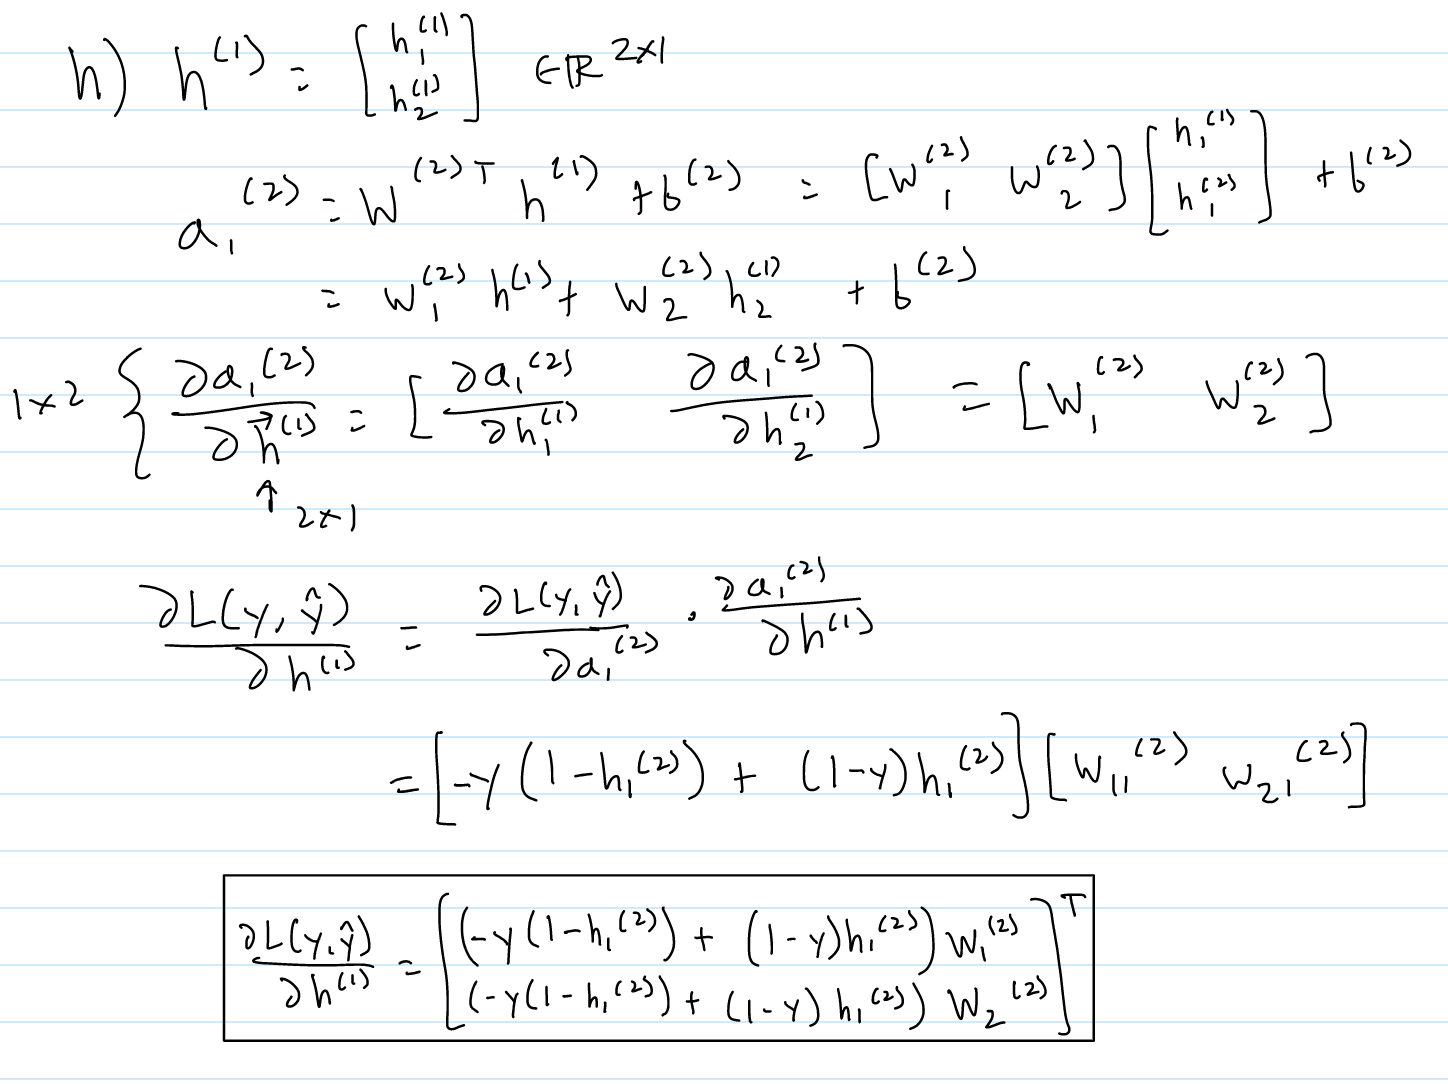

#### 1.i. Backpropagation Simple: Take a break (2pts)

Let $\mathbf{a}^{(1)} = (a_1^{(1)}, a_2^{(1)})^{T}$. Compute $\frac{\partial \mathbf{h}^{(1)}}{\partial \mathbf{a}^{(1)} }$ followed by $ \frac{\partial L(y, \hat{y})}{\partial \mathbf{a}^{(1)} }$. 

**__solution__:**

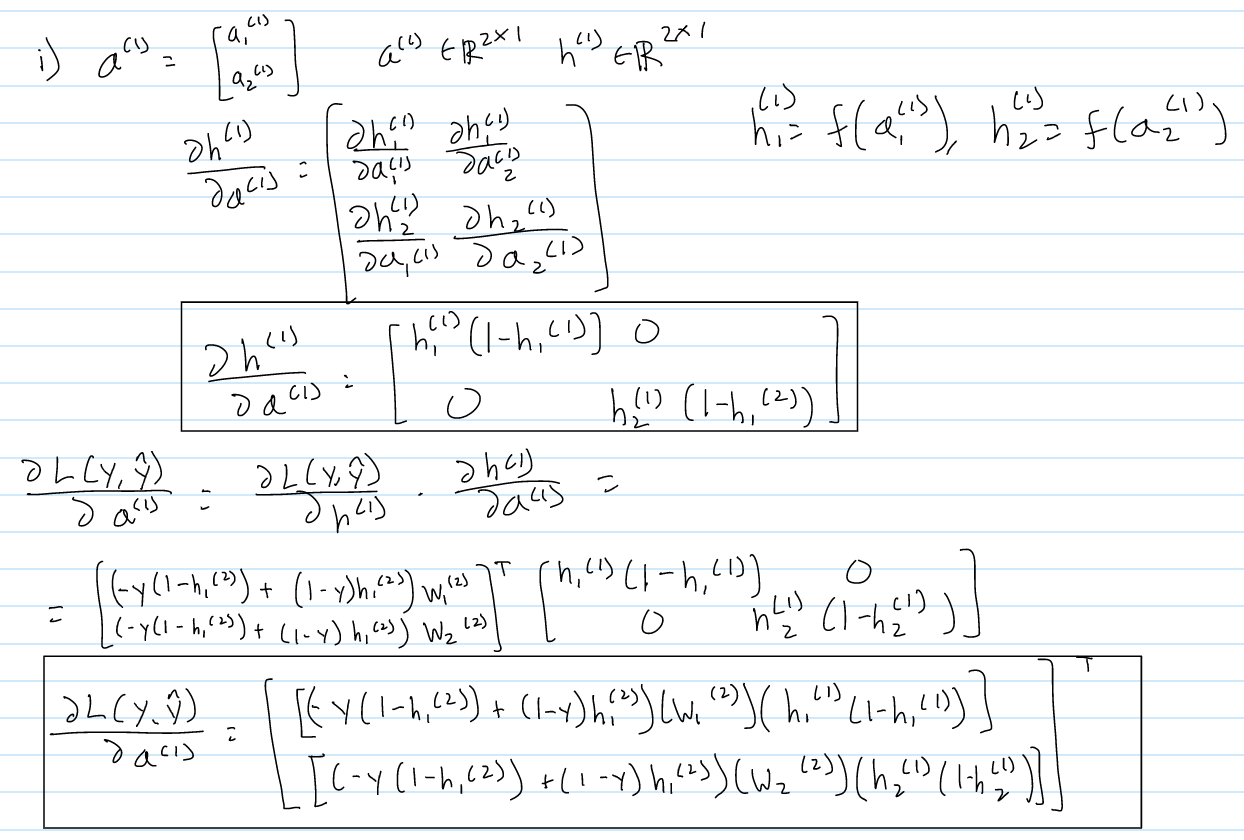

#### 1.j. Backpropagation Expert: Time to show off (10pts)

Compute $ \frac{\partial L(y, \hat{y})}{\partial\mathbf{W}^{(1)} }$ and $ \frac{\partial L(y, \hat{y})}{\partial \mathbf{b}^{(1)}}$, and substitute appropriate variables in terms of input data $\mathbf{x} \in \mathbb{R}^3$.

**__solution__:**

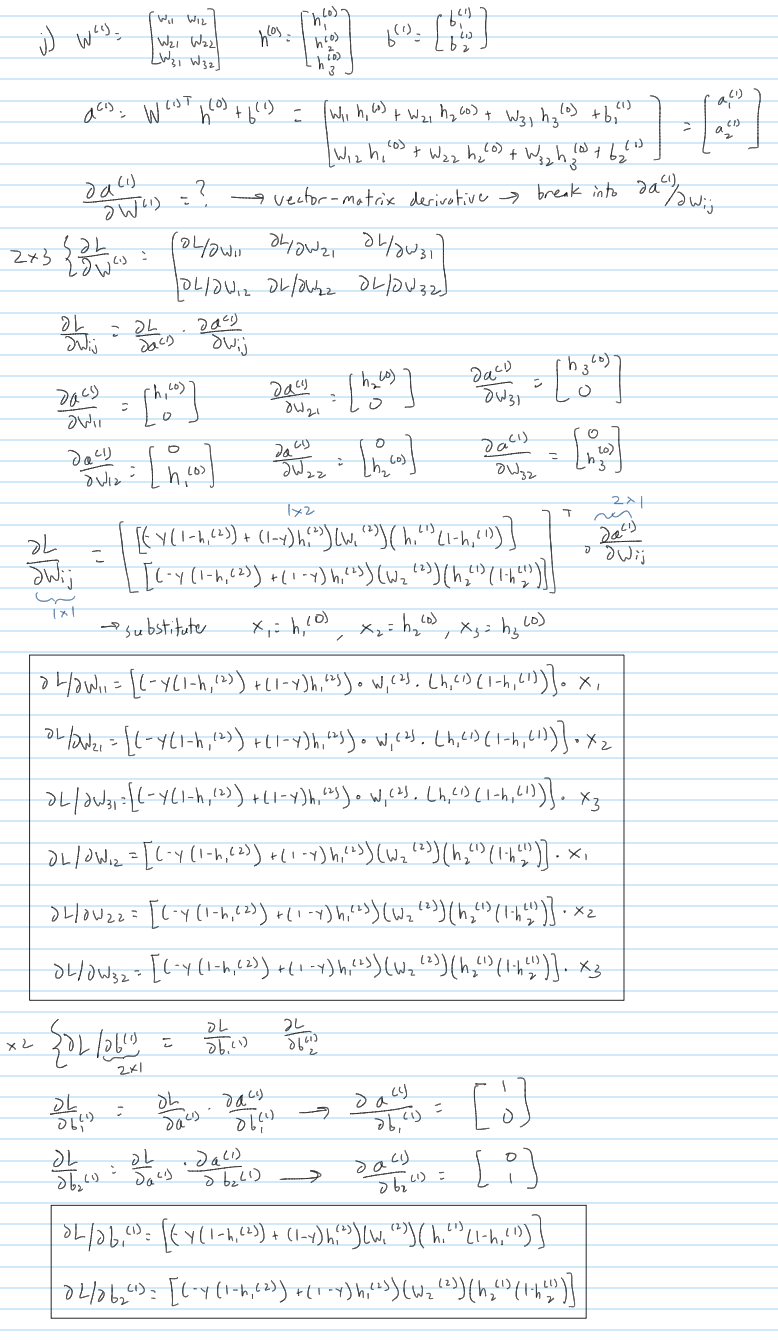

#### 1.k. From Derivation to Implementation (4pts)

Write down a single step of stochastic gradient descent for each of the model parameter $\boldsymbol{\Theta}$ with relavent derivatives derived before. You can assume we are using a constant learning rate $\eta$ for a given data $\mathbf{x} \in \mathbb{R}^3$. Depending on the derivative convention you used, you might need to be careful about your dimension. 


**__solution__:**

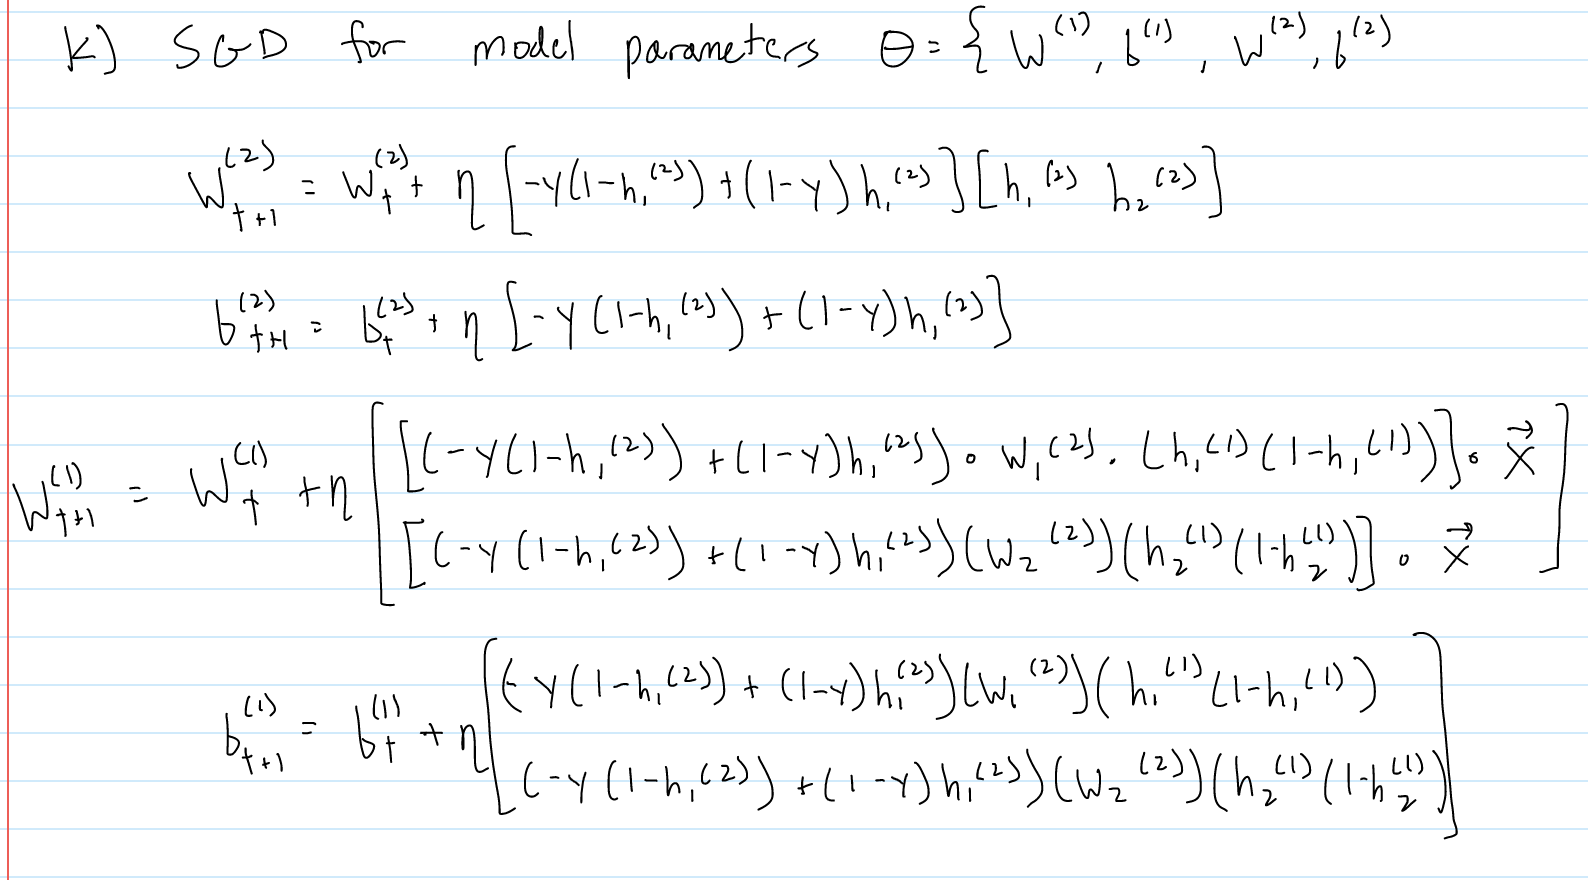

#### 1.$\ell$. Take away message from Backpropagation (2pts)

In practice (packages like PyTorch), the forward pass also saves intermediate values at each node. In backward pass, we compute local gradients and evaluate those gradients at their corresponding intermediate values stored from the forward pass. Those local gradients computation propagates information to 'correct' model weights $\boldsymbol{\Theta}$ back which corresponding to the name **backpropagation**. Explain briefly, how would the computation speed be affected if we did not save intermediate values at the forward pass.

**__Solution__**:  

Computational speed would decrease. To calculate each local gradient, the intermediate value at the node is necessary. If this were not saved, it would have to be calculated via a partial forward propagation to calculate each local gradient. 


## Problem 2: Introduction to Pytorch (42 points)

### 2.0: Pytorch tutorials
This homework will introduce you to [PyTorch](https://pytorch.org), currently the fastest growing deep learning library, and the one we will use in this course.

Before starting the homework, please go over these introductory tutorials on the PyTorch webpage:

*   [60-minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

In [87]:
import torch

### 2.1. Simple function (12pts)

`torch.Tensor` is a data structure to store data and parameters. We often set `requires_grad=True` when we create a `torch.Tensor` if we want to compute gradient with respect to it. (There are situations that we perfer to set `requires_grad=False` to save computation time and memory).

`autograd` collects gradients for a `torch.Tensor` with `requires_grad=True`. 

Here we will explore backpropagation on the simple function, $f= \frac{x+y}{z}$. with `torch.tensor` and `tensor.autograd`.

####2.1.1 Creat Tensors (3pts)
Create and print the three inputs to function $f$ with values $x=3$, $y=6$ and $z=-5$ as `tensors` and set `requires_grad=True`. 

In [88]:
# solution here
x = torch.tensor([3],dtype=torch.float32,requires_grad=True)
print(f"x: {x[0]} \n")
y = torch.tensor([6],dtype=torch.float32,requires_grad=True)
print(f"y: {y[0]} \n")
z = torch.tensor([-5],dtype=torch.float32,requires_grad=True)
print(f"z: {z[0]} \n")


x: 3.0 

y: 6.0 

z: -5.0 



####2.1.2 Computation Graph (4pts)
The following is a computation graph for the function of the interests $f = \frac{x+y}{z}$. The round nodes are input variables, the square nodes represents arithmetic operators, the diamond node represents the output of the function. We have $g, q$ (they are functions) on top of arrows which we call them as intermediate nodes of the computation graph.  


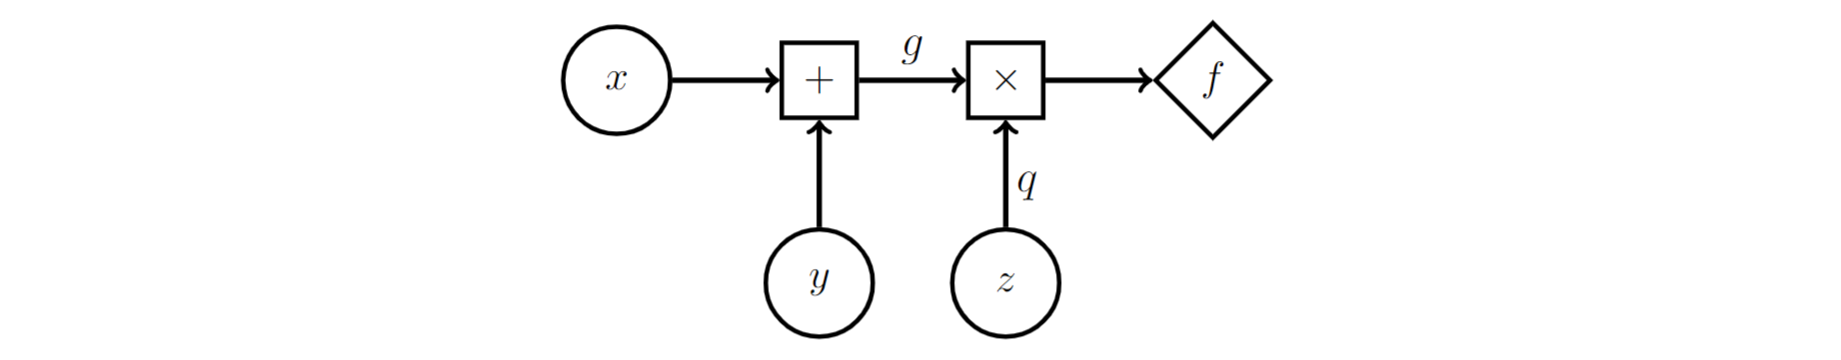


1.   Define new veriables as the following: $g=x+y$, $q=\frac{1}{z}$ and $f= g \times q$. This step allows you to 'communicate' with `autograd` the above is the computational graph of interests.

2.   Print $g,q,f$. (Their second argument is a bit different, check whether they make sense to you based on how each variable were created).

3.   Run `f.backward(retain_graph=True)` to compute the gradients of function $f$ w.r.t. $x,y,z$, respectively. (The `retain_graph` attribute tells autograd to keep the computation graph around after backward pass as opposed deleting it in order to free up some memory). 

4.   Print gradients: $f$ w.r.t. $x,y,z,q$. Note that the gradient for $q$ will be `None`. This is due to that $q$ was created as an intermediate node. (Side information: to access gradients for intermediate nodes in PyTorch you can use hooks as mentioned in [this answer](https://discuss.pytorch.org/t/why-cant-i-see-grad-of-an-intermediate-variable/94/2).)

In [89]:
# solution here
#Part 1
g = x.add(y)
q = 1/z
f = g*q

#Part 2 
print(f"g: {g[0]} \n")
print(f"q: {q[0]} \n")
print(f"f: {f[0]} \n")

#Part 3
f.backward(retain_graph=True)

#Part 4
print(f"x gradient: {x.grad} \n")
print(f"y gradient: {y.grad} \n")
print(f"z gradient: {z.grad} \n")
print(f"q gradient: {q.grad} \n")

g: 9.0 

q: -0.20000000298023224 

f: -1.8000000715255737 

x gradient: tensor([-0.2000]) 

y gradient: tensor([-0.2000]) 

z gradient: tensor([-0.3600]) 

q gradient: None 



/usr/local/lib/python3.8/dist-packages/torch/_tensor.py:1083: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:477.)
  return self._grad


####2.1.3 grad.zero_() for tensors (2pts)

If we now run the above cell again, it will add the gradients to their previous values. Try it out yourself, you shall see something changes to the printed lines. This is sometimes handy but for now, we want to avoid this from happening.

To avoid this from happening, we need a command to 'clear up' the previouly stored gradient for a `tensor` object. Use the following cell, write a few lines that the output of gradients does not change even we run the cell multiple time. Print gradients w.r.t. $x,y,z$ after you 'clear up' the stored gradients and after you run `f.backward(retain_graph=True)`.

In [90]:
# solution here
x.grad = torch.tensor([0],dtype=torch.float32)
y.grad = torch.tensor([0],dtype=torch.float32)
z.grad = torch.tensor([0],dtype=torch.float32)
q.grad = torch.tensor([0],dtype=torch.float32)

f.backward(retain_graph=True)

print(f"Gradient w.r.t. x: {x.grad} \n")
print(f"Gradient w.r.t. y: {y.grad} \n")
print(f"Gradient w.r.t. z: {z.grad} \n")
print(f"Gradient w.r.t. q: {q.grad} \n")

Gradient w.r.t. x: tensor([-0.2000]) 

Gradient w.r.t. y: tensor([-0.2000]) 

Gradient w.r.t. z: tensor([-0.3600]) 

Gradient w.r.t. q: tensor([0.]) 



#### 2.1.4 Verify Gradient (3pts)

Compute gradients w.r.t. $x,y,z$ by hand to verify the output from above.

**__solution__**:
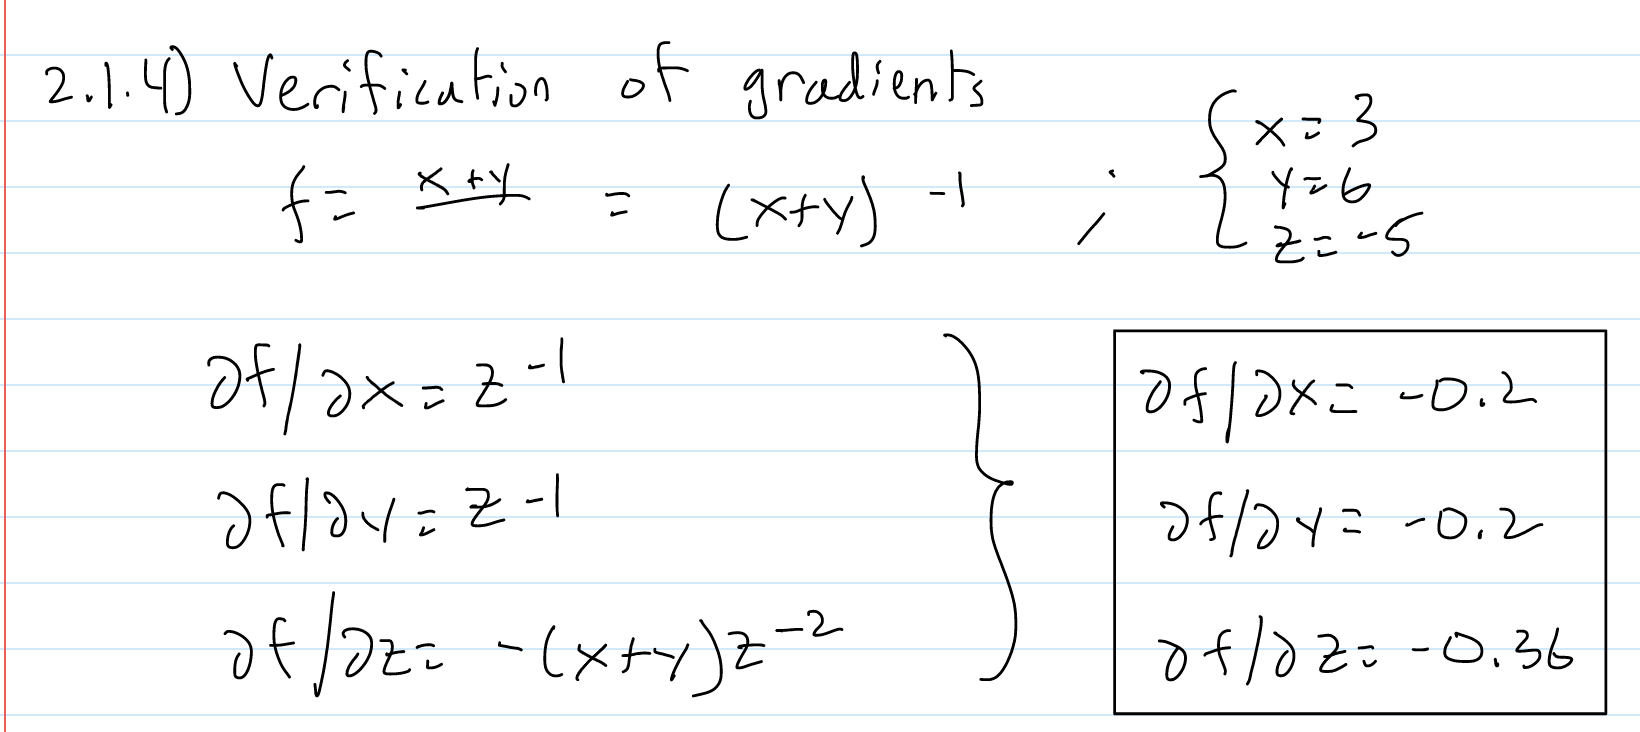

### 2.2 Function with Vectors/Matrices Inputs (10pts)

Now, we explore function with vectors/matrices inputs and computing their gradients. Implement the follwoing function $g(\mathbf{x}, \mathbf{w}) = f(\mathbf{w}^T \mathbf{x})$, where $f(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$ is known as a Tanh activation function (look up `torch.tanh`) . We will eventually use model of this type as a binary classifier so $\mathbf{w}, \mathbf{x}$ can be interpreted as model weights, bias, respectively.

#### 2.2.1 Autograd (4pts)

Initialize $\mathbf{x} =[2, -4, 1]$ and the weights to $ \mathbf{w}=[3, 1, -2]$. Print out the value $g$ and the gradients of $g$ w.r.t. $\mathbf{w}, \mathbf{x}$, respectively.

In [91]:
# initialize and print g
x = torch.tensor([2,-4,1],dtype=torch.float32,requires_grad=True)
w = torch.tensor([3,1,-2],dtype=torch.float32,requires_grad=True)
g = torch.tanh(torch.dot(w,x))
print(g)
print(f"g = {g}\n")

# compute and print gradients 
g.backward(retain_graph=True)
print(f"Gradient w.r.t. w: {w.grad}\n")
print(f"Gradient w.r.t x: {x.grad}\n")

tensor(0., grad_fn=<TanhBackward0>)
g = 0.0

Gradient w.r.t. w: tensor([ 2., -4.,  1.])

Gradient w.r.t x: tensor([ 3.,  1., -2.])



#### 2.2.2 Verify Gradients (6pts)

Derive $ \frac{\partial g}{ \partial \mathbf{x}} $ and  $ \frac{\partial g}{ \partial \mathbf{w}} $ by hand, evaluate them and verify your results in 2.2.1. (Write out necessary steps i.e. chain rule like how you derived question 1, your should be able to simplify $f'(z)$ in terms of $f(z)$, and including steps for substituting numbers that leads to final numeric results, you might find the printed line above for the value of $g$ is helpful). 

**__Solution__**:

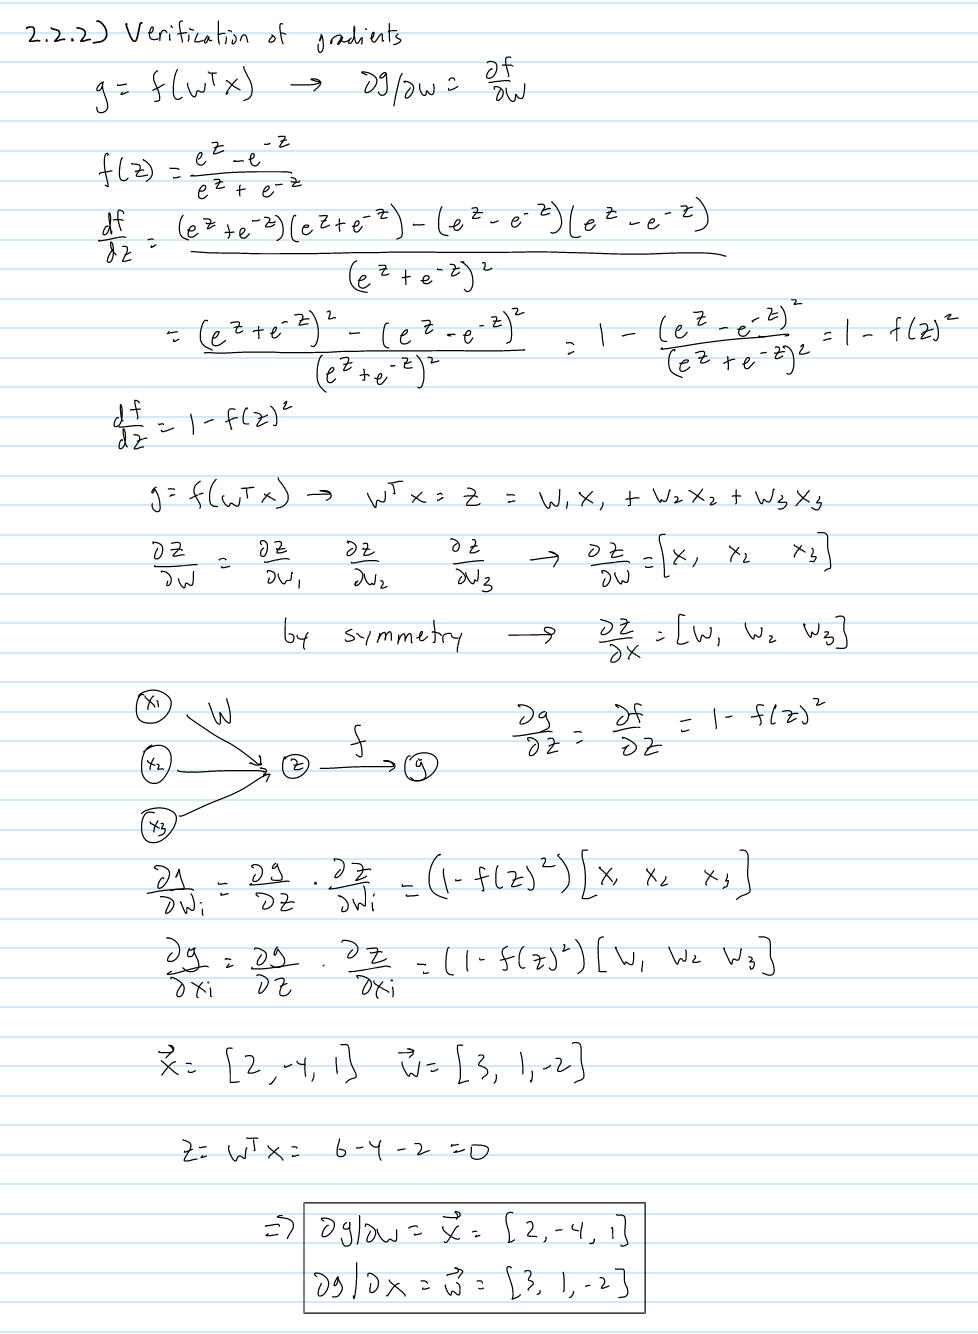

### 2.3. Build Blocks in torch.nn (3pts)

We utilized `torch.tanh` as activation function above instead of coding tanh activation function from scratch. The motivation of using `torch.nn` is the same: many useful functions, building blocks used to build deep learning models are already implemented in `torch.nn`. 

Using `torch.nn`, build the following model, which is a binary classifier:
\begin{align*}
g(\mathbf{x}) = f(\mathbf{w}^T \mathbf{x} + b )
\end{align*}
where $\mathbf{x}$ is the input data, $ \mathbf{w}$ is the weight, $b$ is the bias, $f(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$ is a tanh activation function. 
A building block to represent $\mathbf{w}^T \mathbf{x} + b$ is also coded in `torch.nn`, that is called a linear layer `torch.nn.Linear()`. 

1.   Build the above model with weights to $\mathbf{w}=[3, 1]$ bias $b=-2$.
2.   Initialize a data $\mathbf{x}=[2, -4]$ (you don't need to set `requires_grad=True` for $\mathbf{x}$ because in the context of machine learning, we do not require gradient with respect to data), and print the value of $g(\mathbf{x})$
3.   Compute $\frac{\partial g}{\partial \mathbf{w}}, \frac{\partial g}{\partial b}$ by running `backward()` and print them out (they will be stored in the Linear variable, e.g. in `.weight.grad`.)

Check: we build a equivlant model with question 2.2, their outout should match.



In [92]:
import torch.nn as nn

# initialize linear layer and print parameters:
w = torch.tensor([3,1],dtype=torch.float32,requires_grad=True)
b = torch.tensor(-2,dtype=torch.float32,requires_grad=True)
print(f"Weights: w = {w}\n")
print(f"Bias: b = {b}\n")

# initialize data and print output g
x = torch.tensor([2,-4],dtype=torch.float32)
model = torch.nn.Linear(2,1,bias=True)
model.weight = nn.Parameter(w)
model.bias = nn.Parameter(b)
g = torch.tanh(model(x))
print(f"g = {g}\n")

# compute and print gradients w.r.t each parameters:
g.backward(retain_graph=True)
print(f"Gradient of g w.r.t. w: {model.weight.grad}\n")
print(f"Gradient of g w.r.t. b: {model.bias.grad}\n")

Weights: w = tensor([3., 1.], requires_grad=True)

Bias: b = -2.0

g = 0.0

Gradient of g w.r.t. w: tensor([ 2., -4.])

Gradient of g w.r.t. b: 1.0



### 2.4. A Simple Classifier (*10pts*)
After familiarizing basic functionalities of `tensors`, `autograd`, `torch.nn`, we will build and train a simple binary classifier. 

Read the [Neural Networks tutorial](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html) if you feel lost.

#### 2.4.1 Model Structure (4pts)
Make a subclass of the `Module` class called `Classifier`. Set model parameter dimension same as question 2.3. You will need to define `__init__()` and `forward()` methods

In [93]:
import torch.nn as nn

# solution here
class Classifier(nn.Module):
  
  def __init__(self):

    # initialize parents class
    super().__init__()

    self.model = nn.Linear(2,1,bias=True)

  def forward(self,x):
    x = x.view(-1,2) #reshape input to [# data points, # features]
    output = self.model(x)
    output = torch.tanh(output)
    return output
    


#### 2.4.2 Parameter Initilization (2pts)
We have built the classifier structure, we also need to initialize the weights and bias. In practice, weight initialization matters a lot, as a bad initialization might cause the vanishing/exploding gradient problem.

For this question, you'll complete the function `weights_init` to initialize the weights and bias for the model. Sepcifically, you will use `kaiming_uniform_` method from `torch.nn.init` to initialize the weights and initialize the bias to 0.01. You can take a look at the documentation [here](https://pytorch.org/docs/stable/nn.init.html)  
__Note__: for `kaiming_uniform_` you don't need to set the attribute `a`, `mode`, or `non_linearity`.

In [94]:
from torch.nn import init
def weights_init(module):
    if isinstance(module, nn.Linear):
        # initialize weight using kaiming_uniform_
        init.kaiming_uniform_(torch.zeros(2,1))
        # initialize bias to be 0.01
        module.bias.data.fill(0.01)

#### 2.4.3 Initialize a Model (4pts)

1.   Now create a instance of your `Classifier` class called `my_classifier`, and print your modeel `my_classifier`.
2.   Initialize model parameters with `weights_init()`, and print out initial weights and bias
3.   Given data $\mathbf{x} = [-1., -2.]$, print out the model output
4.   Run backpropagation once and print out gradients. Make sure you zero out the gradients first, by calling `my_classifier.zero_grad()`. This is a good practice to do to avoid accumulating gradient as you observed in 2.1.2.

In [95]:
torch.manual_seed(42)
# initialize and print the network 
my_classifier = Classifier()
print(my_classifier)

# apply the initialization method and print model parameters
weights_init(my_classifier)
for name,param in my_classifier.named_parameters():
  print(f"{name,param.data}\n")

# given input print output
x = torch.tensor([-1,-2],dtype=torch.float32)
output = my_classifier(x)
print(f"Output from classifier: {output}\n")

# backprop and print gradients
my_classifier.zero_grad()
output.backward(retain_graph=True)
params = list(my_classifier.parameters())
print(f"Gradient w.r.t. weights: {params[0]}\n\n")
print(f"Gradient w.r.t. bias: {params[1]}")

Classifier(
  (model): Linear(in_features=2, out_features=1, bias=True)
)
('model.weight', tensor([[0.5406, 0.5869]]))

('model.bias', tensor([-0.1657]))

Output from classifier: tensor([[-0.9545]], grad_fn=<TanhBackward0>)

Gradient w.r.t. weights: Parameter containing:
tensor([[0.5406, 0.5869]], requires_grad=True)


Gradient w.r.t. bias: Parameter containing:
tensor([-0.1657], requires_grad=True)


### 2.5. Model Training (7pts)

We train the classifier initialized from question 2.4. The code below creates a toy dataset containing a few data $\mathbf{x}$ and target $y$ (a binary -1/1 label), as well as a function that plots the data and current decision boundary. You don't need to modify anything here.

w0 = 0.5406103730201721 w1 = 0.5869042277336121 bias = -0.16565565764904022


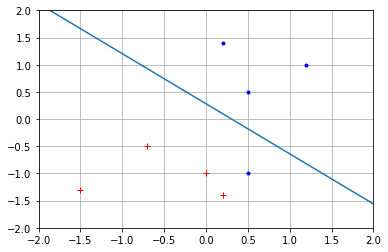

In [96]:
import matplotlib.pyplot as plt

# create some toy 2-D datapoints with binary (-1/1) labels
x = torch.tensor([[1.2, 1], [0.2, 1.4], [0.5, 0.5], 
                  [-1.5, -1.3], [0.2, -1.4], [-0.7, -0.5],
                  [0.5, -1.], [0., -1.]])
y = torch.tensor([-1.0, -1.0, -1.0, 1.0, 1., 1., -1., 1.])

def plot_soln(x, y, params):
    plt.plot(x[y==1,0], x[y==1,1], 'r+')
    plt.plot(x[y==-1,0], x[y==-1,1], 'b.')
    plt.grid(True)
    plt.axis([-2, 2, -2, 2])

    w0 = params[0][0][0].item()
    w1 = params[0][0][1].item()
    bias = params[1][0].item()

    print("w0 =", w0, "w1 =", w1, "bias =", bias)
    dbx = torch.tensor([-2, 2])
    dby = -(1/w1)*(w0*dbx + bias)  # plot the line corresponding to the weights and bias
    plt.plot(dbx, dby)

params = list(my_classifier.parameters())
plot_soln(x, y, params)

#### 2.5.1. Loss Function (3pts)
 
Declare an object `criterion` of type `nn.MSELoss`. 
Compute and print out the loss value for current model.

You might want to reshape the target `y` with `.view()`. As many of you have seen so far with 1d numpy array, it has caused many unwanted errors.

In [97]:
# initialize criterion
criterion = nn.MSELoss()

# forward pass:
y_hat = my_classifier(x)

# compute and print loss:
print(criterion(y_hat, y.view(8,-1)))

tensor(2.5373, grad_fn=<MseLossBackward0>)


####2.5.3. SGD (4pts)

Run the Stochastic Gradient Descent (SGD) optimizer from the `torch.optim` to train your classifier on the toy dataset. Use the entire dataset in each batch so we are perfoming Gradient Descent. Use a learning rate of $0.8$ (no other hyperparameters). You will need to write a training loop to upudate model parameters (use the `.step()` function from the optimize). Plot the data and decision boundary and print the loss after 100 iterations.

Loss after last iteration: 0.022601773962378502

Weights after last iteration: Parameter containing:
tensor([[-3.9640, -1.7706]], requires_grad=True)


Bias after last iteration: Parameter containing:
tensor([-0.6408], requires_grad=True)


w0 = -3.9640209674835205 w1 = -1.7706242799758911 bias = -0.6408470273017883


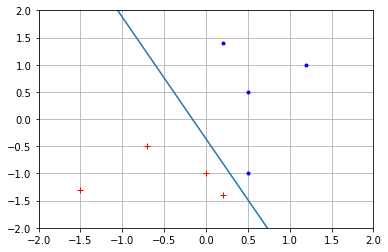

In [98]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(my_classifier.parameters(),lr=0.8)

ls_list = list() #loss 

# training loop
for i in range(100):
  # zero out stored gradients
  optimizer.zero_grad()

  # forward pass 
  output = my_classifier(x)

  # compute loss and backward pass
  loss = criterion(output,y.view(8,-1))
  ls_list.append(loss.item())
  loss.backward()

  # update parameters
  optimizer.step()

# print loss, parameters and decision boundary at the last iteration

print(f"Loss after last iteration: {loss}\n")
params = list(my_classifier.parameters())
print(f"Weights after last iteration: {params[0]}\n\n")
print(f"Bias after last iteration: {params[1]}\n\n")

plot_soln(x,y,params)

